#### This notebook is to find which feature are important

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline  

In [22]:
df = pd.read_csv('../data/processed_balanced_transaction.csv')
df.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
1,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
2,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3
3,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,21,35,27,2021,2,1,2014,8,3
4,733493772,3,4191.39,492,9184,0,5000.0,808.61,733493772,492,...,26,5,28,24,2031,12,1,2014,8,3


In [30]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature transactionAmount (0.463958)
2. feature posEntryMode (0.226086)
3. feature merchantName (0.054416)
4. feature merchantCategoryCode (0.048798)
5. feature accountNumber (0.024231)
6. feature transactionType (0.022366)
7. feature customerId (0.022257)
8. feature enteredCVV (0.019390)
9. feature cardCVV (0.018174)
10. feature cardPresent (0.017428)
11. feature currentBalance (0.012663)
12. feature accountOpenDate_day (0.010505)
13. feature cardLast4Digits (0.010115)
14. feature dateOfLastAddressChange_year (0.008143)
15. feature dateOfLastAddressChange_day (0.006975)
16. feature creditLimit (0.005989)
17. feature posConditionCode (0.005789)
18. feature accountOpenDate_month (0.005602)
19. feature accountOpenDate_year (0.003957)
20. feature dateOfLastAddressChange_month (0.003903)
21. feature availableMoney (0.003715)
22. feature transactionDateTime_month (0.002584)
23. feature transactionDateTime_minute (0.000522)
24. feature transactionDateTime_hour (0.000471)


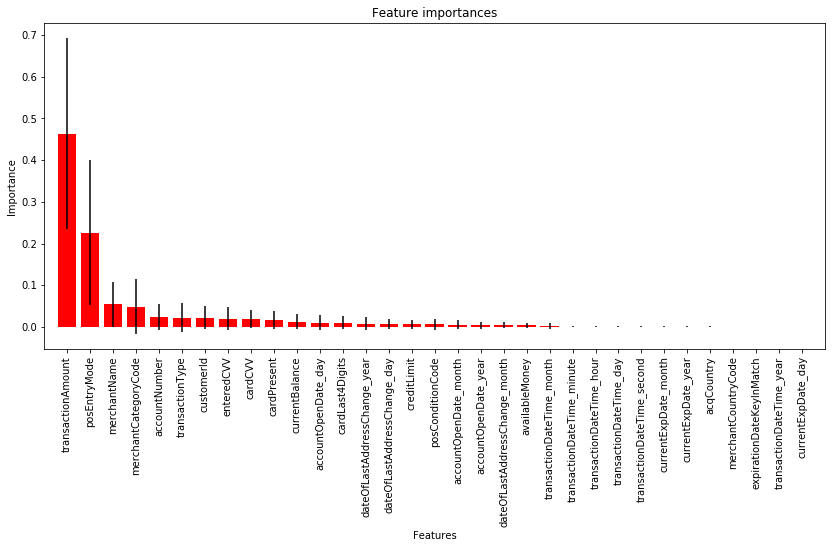

In [33]:
# Plot the feature importances of the forest
columns_sorted_by_importance = [X.columns[f] for f in indices]
plt.figure(figsize=(14,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), columns_sorted_by_importance, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xlim([-1, X.shape[1]])
plt.show()

#### The Accuracy Of Our Full Feature Classifier

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred = forest.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

### Important features 

So The followings are the high importance feature

- transactionAmount
- merchantName
- transactionDateTime_minute
- transactionDateTime_day
- currentBalance
- transactionDateTime_second
- transactionDateTime_hour
- currentExpDate_year
- availableMoney
- currentExpDate_month
- transactionDateTime_month

In [ ]:
feature_count = [10, 15, 20, 25, 30]
scores = []

columns_sorted_by_importance = [X.columns[f] for f in indices]
for c in feature_count:
    X_train_important =   X_train[columns_sorted_by_importance[:c]]
    X_test_important =   X_test[columns_sorted_by_importance[:c]]
    forest_important = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, n_jobs=-1)
    forest_important.fit(X_train_important, y_train)
    y_pred = forest_important.predict(X_test_important)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [60]:
# let write this importance to csv. so that we can use later.

import csv
columns_importance = [(X.columns[f], importances[f]) for f in indices]
with open('../data/feature_importance.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for row in columns_importance:
        writer.writerow(row)

Refernce code from 

- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
- https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

In [14]:
df_copy = df
df_copy.head()

,accountNumber,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,customerId,enteredCVV,...,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,transactionDateTime_second,currentExpDate_year,currentExpDate_month,currentExpDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
0,733493772,3,4888.67,492,9184,0,5000.0,111.33,733493772,492,...,9,22,32,39,2023,6,1,2014,8,3
1,733493772,3,4863.92,492,9184,0,5000.0,136.08,733493772,492,...,11,13,36,55,2027,12,1,2014,8,3
2,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,1,41,11,2024,10,1,2014,8,3
3,733493772,3,4449.18,492,9184,0,5000.0,550.82,733493772,492,...,16,21,35,27,2021,2,1,2014,8,3
4,733493772,3,4191.39,492,9184,0,5000.0,808.61,733493772,492,...,26,5,28,24,2031,12,1,2014,8,3


In [15]:
df_copy.drop_duplicates(keep = False, inplace = True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622954 entries, 0 to 622953
Data columns (total 34 columns):
accountNumber                    622954 non-null int64
acqCountry                       622954 non-null int64
availableMoney                   622954 non-null float64
cardCVV                          622954 non-null int64
cardLast4Digits                  622954 non-null int64
cardPresent                      622954 non-null int64
creditLimit                      622954 non-null float64
currentBalance                   622954 non-null float64
customerId                       622954 non-null int64
enteredCVV                       622954 non-null int64
expirationDateKeyInMatch         622954 non-null int64
isFraud                          622954 non-null int64
merchantCategoryCode             622954 non-null int64
merchantCountryCode              622954 non-null int64
merchantName                     622954 non-null int64
posConditionCode                 622954 non-null int64
pos